In [1]:
import os
import os
os.getcwd()
#os.chdir('C://Users//guozhen/Desktop/Python/')
os.chdir('//storage1.ris.wustl.edu/ali.javaheri/Active/Projects/')
os.getcwd()

'\\\\storage1.ris.wustl.edu\\ali.javaheri\\Active\\Projects'

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import scipy.io
import os
import anndata

import matplotlib as mpl
import matplotlib.pyplot as plt

outdir = "//storage1.ris.wustl.edu/ali.javaheri/Active/Projects/All_3_Groups/Output/"

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi = 100, figsize = (9, 9), dpi_save = 600)

In [3]:
### example for sample "Dox_1778”
input_dir = './All snRNA data/Dox_1778_GEXoutsfiltered_feature_bc_matrix/unzip/'
counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
genes = np.array(scr.load_genes(input_dir + 'features.tsv', delimiter = '\t', column = 1))

print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 5124 rows, 36601 columns
Number of genes in gene list: 36601


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 7.0%
Estimated detectable doublet fraction = 49.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 14.3%
Elapsed time: 6.6 seconds


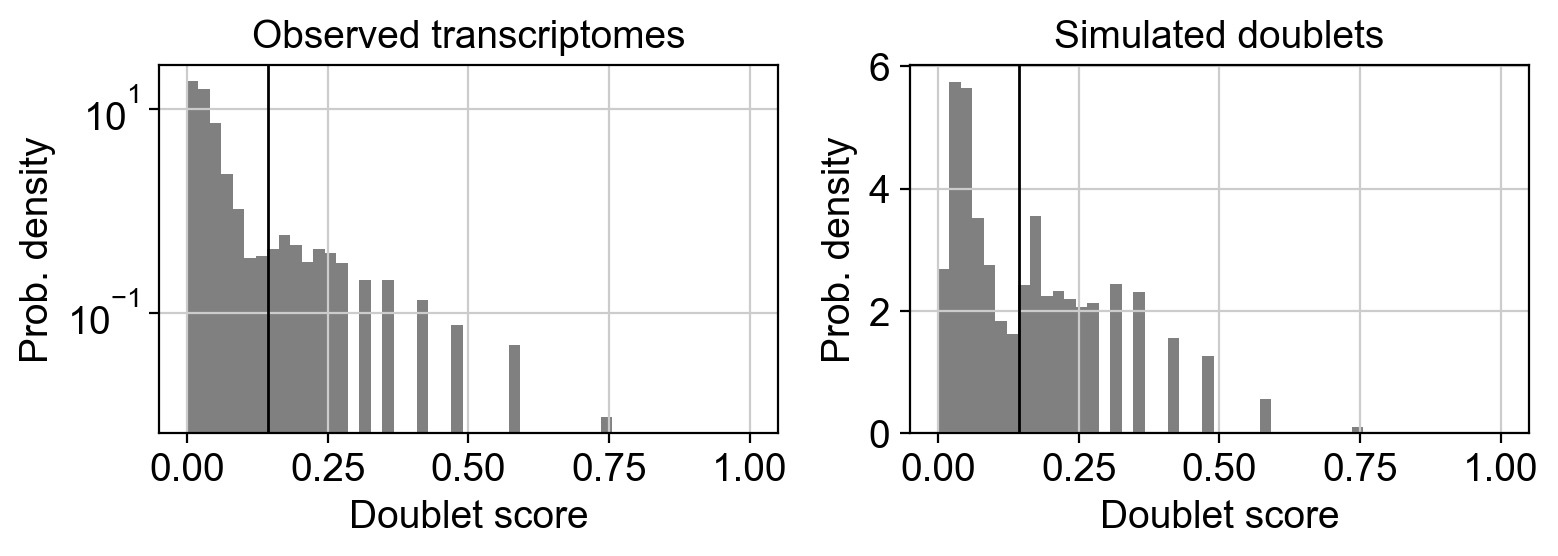

In [4]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate = 0.05)

doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts = 2,
                                                          min_cells = 3,
                                                          min_gene_variability_pctl = 85,
                                                          n_prin_comps = 30)
scrub.plot_histogram();

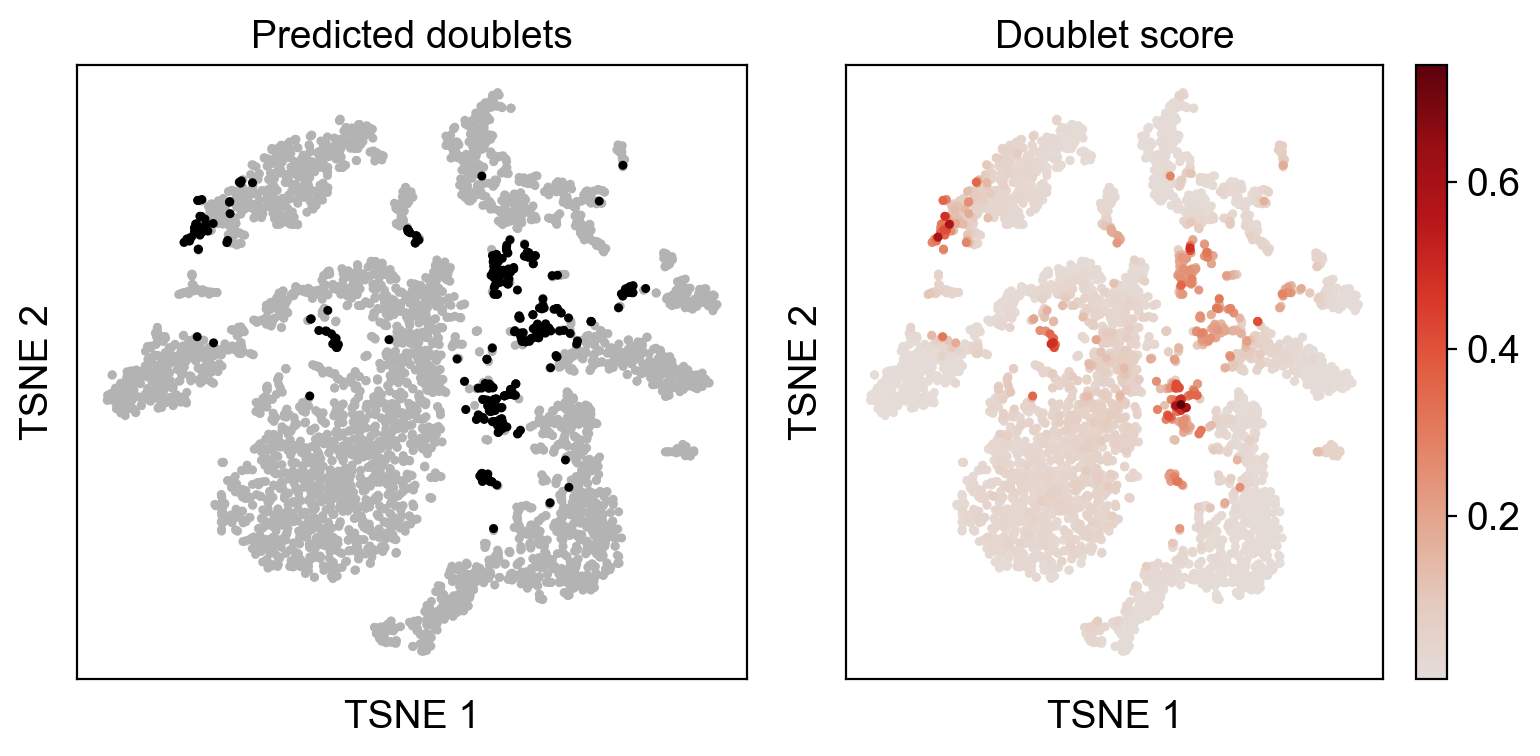

In [5]:
def get_tsne(X, angle = 0.5, perplexity = 30, random_state = 0, verbose = False):
    from sklearn.manifold import TSNE
    return TSNE(angle = angle, perplexity = perplexity, random_state = random_state, verbose = verbose).fit_transform(X)

scrub.set_embedding('TSNE', scr.get_tsne(scrub.manifold_obs_, 0.5, 10))
scrub.plot_embedding('TSNE', order_points = True);

In [7]:
barcodes = np.array(pd.read_csv(input_dir + '/barcodes.tsv', header = None, index_col = None))
a = np.array([barcodes[:, 0], doublet_scores, predicted_doublets])
data = pd.DataFrame({'barcodes': a[0, :], 'score': a[1, :], 'prediction': a[2, :]})
data.to_csv('./All snRNA data/Dox_1778_GEXoutsfiltered_feature_bc_matrix/unzip/doublet_prediction.txt', index = False, header = True)